# Collabrative learning Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import difflib
%matplotlib inline

In [2]:
# loading the dataset
#cmovies_df = pd.read_csv("huge_cmovies_dataset.csv")
cmovies_df = pd.read_csv("cmovies_dataset.csv")
cmovies_df.head()

,Unnamed: 0,movieId,title,genres,userId,rating,timestamp
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [3]:
cmovies_df.describe()

,Unnamed: 0,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,50417.500000,19435.295718,326.127564,3.501557,1.205946e+09
std,29108.990209,35530.987199,182.618491,1.042529,2.162610e+08
min,0.000000,1.000000,1.000000,0.500000,8.281246e+08
25%,25208.750000,1199.000000,177.000000,3.000000,1.019124e+09
50%,50417.500000,2991.000000,325.000000,3.500000,1.186087e+09
75%,75626.250000,8122.000000,477.000000,4.000000,1.435994e+09
max,100835.000000,193609.000000,610.000000,5.000000,1.537799e+09


In [4]:
ratings = pd.DataFrame(cmovies_df.groupby('title')['rating'].mean())
ratings.info()
#ratings.shape

<class 'pandas.core.frame.DataFrame'>
Index: 9719 entries, '71 (2014) to À nous la liberté (Freedom for Us) (1931)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  9719 non-null   float64
dtypes: float64(1)
memory usage: 151.9+ KB


In [5]:
ratings['number_of_ratings'] = cmovies_df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:>

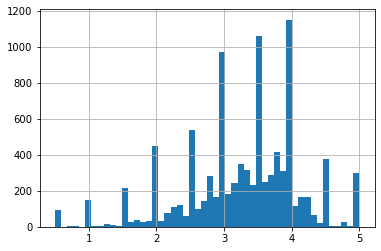

In [6]:
ratings['rating'].hist(bins=50)

<AxesSubplot:>

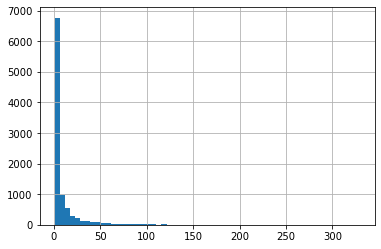

In [7]:
ratings['number_of_ratings'].hist(bins=60)

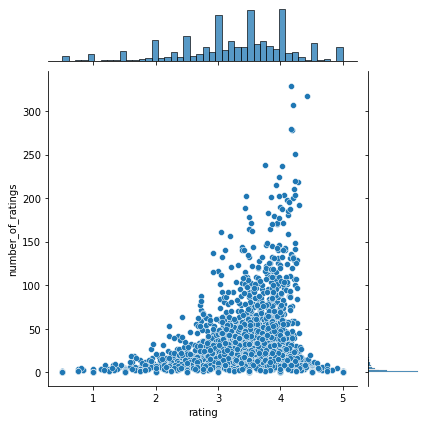

In [8]:
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [9]:
# cretaing a matrix or table with rows consisting of all users in the data set
# and coloumns consisting of all the movies in the dataset
movie_matrix = cmovies_df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ratings.sort_values('number_of_ratings', ascending=False).head(30)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [11]:
user_fav_movie = input("Whats that movie which revolves always in you're head? : ")
close_match = difflib.get_close_matches(user_fav_movie.title(), list(cmovies_df['title']))
if bool(close_match):
    user_fav_movie_ratings = movie_matrix[close_match[0]]
    print(close_match)
else:
    print("couldn't find any matches!")

Whats that movie which revolves always in you're head? : ice age
['Ice Age (2002)', 'Ice Age (2002)', 'Ice Age (2002)']


In [12]:
user_fav_movie_ratings.head(10)

userId
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     3.5
8     NaN
9     4.0
10    NaN
Name: Ice Age (2002), dtype: float64

In [13]:
similar_to_user_fav_movie = movie_matrix.corrwith(user_fav_movie_ratings)

C:\Users\sasiv\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\sasiv\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [14]:
similar_to_user_fav_movie.head(20)

title
'71 (2014)                                          NaN
'Hellboy': The Seeds of Creation (2004)             NaN
'Round Midnight (1986)                              NaN
'Salem's Lot (2004)                                 NaN
'Til There Was You (1997)                           NaN
'Tis the Season for Love (2015)                     NaN
'burbs, The (1989)                            -0.654654
'night Mother (1986)                                NaN
(500) Days of Summer (2009)                    0.376976
*batteries not included (1987)                      NaN
...All the Marbles (1981)                           NaN
...And Justice for All (1979)                  1.000000
00 Schneider - Jagd auf Nihil Baxter (1994)         NaN
1-900 (06) (1994)                                   NaN
10 (1979)                                           NaN
10 Cent Pistol (2015)                               NaN
10 Cloverfield Lane (2016)                     0.555556
10 Items or Less (2006)                   

In [15]:
corr_user_fav_movie = pd.DataFrame(similar_to_user_fav_movie, columns=['correlation'])
corr_user_fav_movie.dropna(inplace=True)
corr_user_fav_movie.head(20)

,correlation
title,
"'burbs, The (1989)",-0.654654
(500) Days of Summer (2009),0.376976
...And Justice for All (1979),1.000000
10 Cloverfield Lane (2016),0.555556
10 Items or Less (2006),1.000000
10 Things I Hate About You (1999),0.225707
"10,000 BC (2008)",0.618853
101 Dalmatians (1996),0.002602
101 Dalmatians (One Hundred and One Dalmatians) (1961),-0.262381


In [16]:
corr_user_fav_movie = corr_user_fav_movie.join(ratings['number_of_ratings'])
corr_user_fav_movie.head(20)

,correlation,number_of_ratings
title,,
"'burbs, The (1989)",-0.654654,17
(500) Days of Summer (2009),0.376976,42
...And Justice for All (1979),1.000000,3
10 Cloverfield Lane (2016),0.555556,14
10 Items or Less (2006),1.000000,3
10 Things I Hate About You (1999),0.225707,54
"10,000 BC (2008)",0.618853,17
101 Dalmatians (1996),0.002602,47
101 Dalmatians (One Hundred and One Dalmatians) (1961),-0.262381,44


In [17]:
recommendation_movies = corr_user_fav_movie[corr_user_fav_movie['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(20)

In [18]:
recommendation_movies

,correlation,number_of_ratings
title,,
Cliffhanger (1993),0.794624,101
Clear and Present Danger (1994),0.763763,110
Crimson Tide (1995),0.622171,103
Inception (2010),0.618368,143
"Beautiful Mind, A (2001)",0.565357,123
Batman Begins (2005),0.556918,116
Die Hard: With a Vengeance (1995),0.548173,144
Shrek (2001),0.514254,170
Finding Nemo (2003),0.495855,141


In [19]:
final = recommendation_movies.iloc[:11,:0]

In [20]:
final.iloc[:]

""
title
Cliffhanger (1993)
Clear and Present Danger (1994)
Crimson Tide (1995)
Inception (2010)
"Beautiful Mind, A (2001)"
Batman Begins (2005)
Die Hard: With a Vengeance (1995)
Shrek (2001)
Finding Nemo (2003)


In [21]:
final_list=[]
for i in range(1,11):
    row = final.index[i]
    final_list.append(row)
final_list

['Clear and Present Danger (1994)',
 'Crimson Tide (1995)',
 'Inception (2010)',
 'Beautiful Mind, A (2001)',
 'Batman Begins (2005)',
 'Die Hard: With a Vengeance (1995)',
 'Shrek (2001)',
 'Finding Nemo (2003)',
 'Outbreak (1995)',
 'Firm, The (1993)']

# The End Bixchh